In [1]:
suppressWarnings(suppressPackageStartupMessages({
    library(tidyverse)
    library(data.table)
}))


# compute PRS p-value

Yosuke Tanigawa


We thought it might be possible to recompute the p-value from the z-score or t-score using `pnorm` and `pt` functions.

Here, we checked examples (INI50 for Gaussian model and HC269 for binomial model) and see if it works.

Unfortunately, it doesn't give us the consistent results (numerical issue???)



In [4]:
source('0_parameters.sh')


In [17]:
c('INI50', 'HC269') %>%
lapply(function(GBE_ID){
    file.path(res_scratch_d, 'tmp_glmfit', paste0(GBE_ID, '.tsv')) %>%
    fread() %>% rename('GBE_ID'='#phe')
}) %>% bind_rows() -> df


In [18]:
df$p_z <- 2*pnorm(q=df$z_or_t_value, lower.tail=FALSE)
df$p_t <- 2*pt(q=df$z_or_t_value, df=df$n_test-1, lower.tail=FALSE)


In [25]:
df %>%
filter(family == 'gaussian') %>%
filter(str_detect(variable, 'PC'))

GBE_ID,family,n_test,variable,estimate,SE,z_or_t_value,P,p_z,p_t
<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
INI50,gaussian,67425,PC1,185.981054,20.43105,9.1028621,9.030452e-20,8.798214e-20,9.030407e-20
INI50,gaussian,67425,PC2,2.076976,20.35116,0.1020569,9.187118e-01,9.187115e-01,9.187118e-01
INI50,gaussian,67425,PC3,152.586685,20.36647,7.4920549,6.862835e-14,6.780356e-14,6.862819e-14
INI50,gaussian,67425,PC4,-25.232734,20.34596,-1.2401839,2.149117e-01,1.785093e+00,1.785088e+00
INI50,gaussian,67425,PC5,-4.561914,20.44659,-0.2231136,8.234477e-01,1.176553e+00,1.176552e+00
INI50,gaussian,67425,PC6,9.961500,20.26263,0.4916193,6.229901e-01,6.229885e-01,6.229901e-01
INI50,gaussian,67425,PC7,-112.690852,20.32520,-5.5443895,2.960833e-08,2.000000e+00,2.000000e+00
INI50,gaussian,67425,PC8,22.656334,20.39479,1.1108884,2.666203e-01,2.666164e-01,2.666203e-01
INI50,gaussian,67425,PC9,20.768634,20.35394,1.0203742,3.075547e-01,3.075510e-01,3.075547e-01


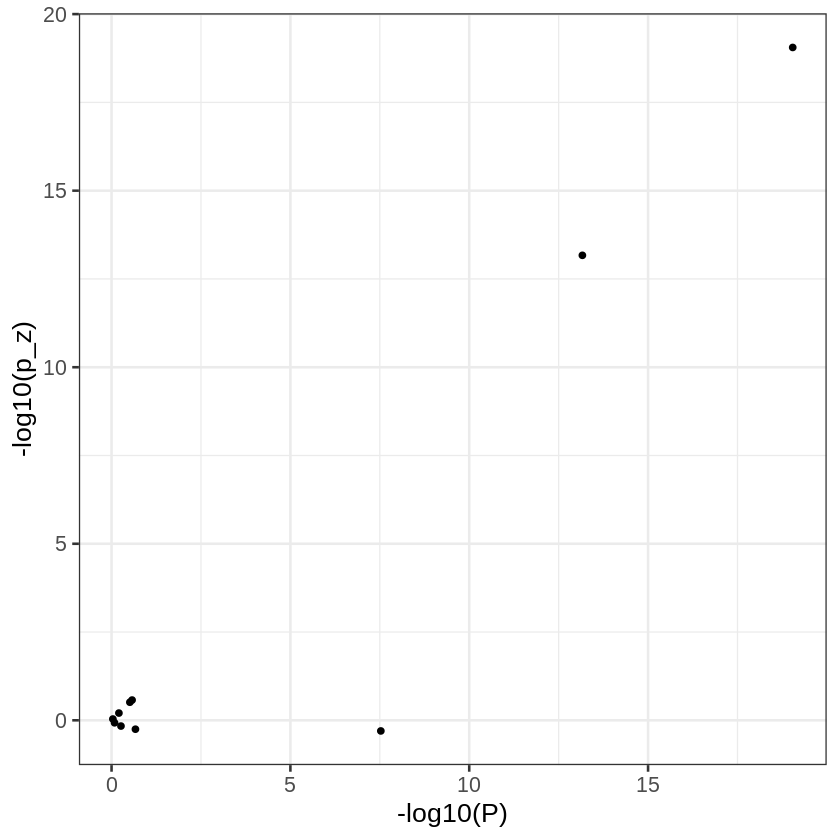

In [26]:
df %>%
filter(family == 'gaussian') %>%
filter(str_detect(variable, 'PC')) %>%
ggplot(aes(x=-log10(P), y=-log10(p_z))) +
geom_point() +
theme_bw(base_size = 16)

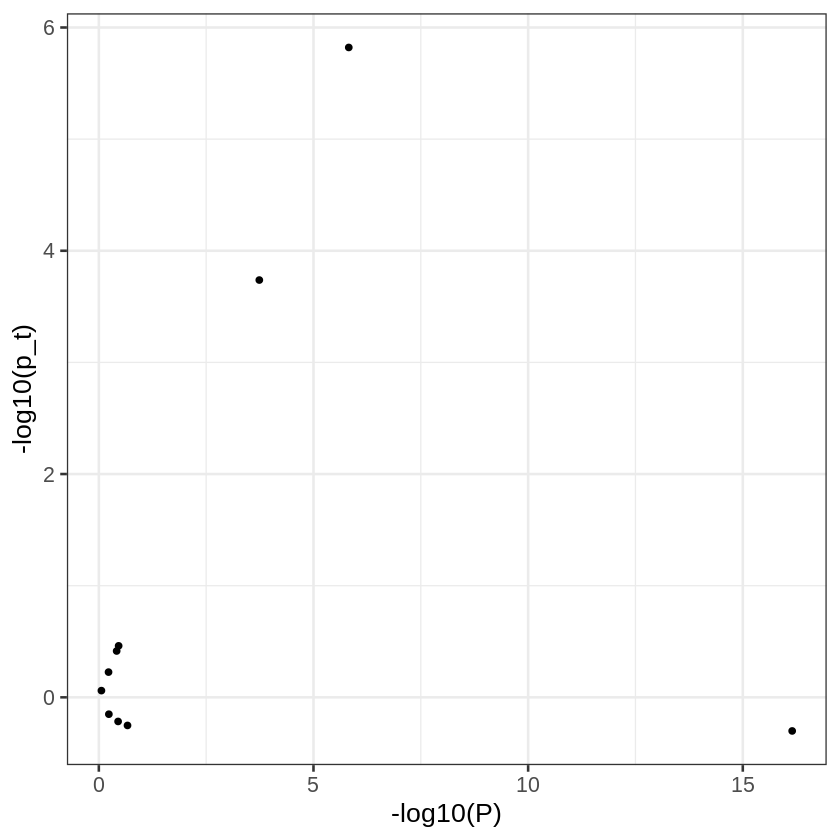

In [27]:
df %>%
filter(family == 'binomial') %>%
filter(str_detect(variable, 'PC')) %>%
ggplot(aes(x=-log10(P), y=-log10(p_t))) +
geom_point() +
theme_bw(base_size = 16)

In [28]:
df

GBE_ID,family,n_test,variable,estimate,SE,z_or_t_value,P,p_z,p_t
<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
INI50,gaussian,67425,(Intercept),170.74845373,0.293641248,581.4866098,0.000000e+00,0.000000e+00,0.000000e+00
INI50,gaussian,67425,age,-0.16960995,0.004397863,-38.5664446,1.112537e-308,2.000000e+00,2.000000e+00
INI50,gaussian,67425,sex,13.37577402,0.070537906,189.6253354,0.000000e+00,0.000000e+00,0.000000e+00
INI50,gaussian,67425,PC1,185.98105377,20.431052644,9.1028621,9.030452e-20,8.798214e-20,9.030407e-20
INI50,gaussian,67425,PC2,2.07697647,20.351163450,0.1020569,9.187118e-01,9.187115e-01,9.187118e-01
INI50,gaussian,67425,PC3,152.58668482,20.366466507,7.4920549,6.862835e-14,6.780356e-14,6.862819e-14
INI50,gaussian,67425,PC4,-25.23273438,20.345961206,-1.2401839,2.149117e-01,1.785093e+00,1.785088e+00
INI50,gaussian,67425,PC5,-4.56191356,20.446591864,-0.2231136,8.234477e-01,1.176553e+00,1.176552e+00
INI50,gaussian,67425,PC6,9.96149957,20.262630349,0.4916193,6.229901e-01,6.229885e-01,6.229901e-01
